Data manipulation  libraries

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')
from subprocess import check_output


Hot encoding

In [4]:
a = pd.read_csv('./data/2016.csv',header=0)
b = pd.read_csv('./data/2016_2.csv', header=0)
c = pd.read_csv('./data/2017.csv', header=0)
d = pd.read_csv('./data/2018.csv', header=0)
# key atrs
important = ["IDE_EDA_ANO","IDE_SEX","DIAB_PAD_MAD","DIAB_HER","DIAB_HIJ",
"DIAB_OTROS","CVE_ACT_FIS","CVE_TAB","CVE_COMB_TUBER",
"CVE_COMB_CANCER","CVE_COMB_OBESIDAD","CVE_COMB_HIPER",
"CVE_COMB_VIH_SIDA","CVE_COMB_DEPRE","CVE_COMB_DISLI","CVE_COMB_CARDIO",
"CVE_COMB_HEPA","CVE_NUT","CVE_OFT",
"CVE_PIES","CVE_DIAB","CVE_TIPO_DISC_MOTO","CVE_TIPO_DISC_VISU",
"PESO","ESTATURA"]




# label

expected="CVE_DIAB"
# vertical join

result = pd.concat([a, b, c, d])

# hot encoding

result= result.replace("Masculino", 1)
result= result.replace("Femenino", 0)
result= result.replace("Si", 1)
result= result.replace("No", 0)
#result['CVE_DIAB'] = result['CVE_DIAB'].replace(0,2)
result["CVE_TAB"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_TAB"])  else 1,
                    axis=1)

result.fillna(0)
result["CVE_NUT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_NUT"])  else 1,
                    axis=1)

result["CVE_OFT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_OFT"])  else 1,
                    axis=1)

result["CVE_PIES"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_PIES"])  else 1,
                    axis=1)
result= result[important]



diab = result
print(diab.columns)

important.remove(expected)


   

Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


Looking for nulls

In [5]:
diab.isnull().sum()

IDE_EDA_ANO           0
IDE_SEX               0
DIAB_PAD_MAD          0
DIAB_HER              0
DIAB_HIJ              0
DIAB_OTROS            0
CVE_ACT_FIS           0
CVE_TAB               0
CVE_COMB_TUBER        0
CVE_COMB_CANCER       0
CVE_COMB_OBESIDAD     0
CVE_COMB_HIPER        0
CVE_COMB_VIH_SIDA     0
CVE_COMB_DEPRE        0
CVE_COMB_DISLI        0
CVE_COMB_CARDIO       0
CVE_COMB_HEPA         0
CVE_NUT               0
CVE_OFT               0
CVE_PIES              0
CVE_DIAB              0
CVE_TIPO_DISC_MOTO    0
CVE_TIPO_DISC_VISU    0
PESO                  0
ESTATURA              0
dtype: int64

Labeling plot

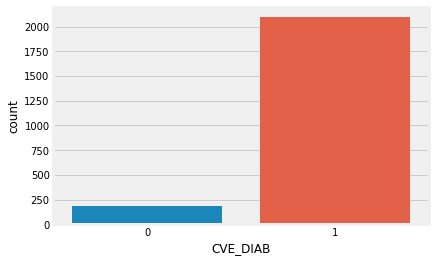

In [6]:
sns.countplot(x=expected,data=diab)
plt.show()

Data Distribution

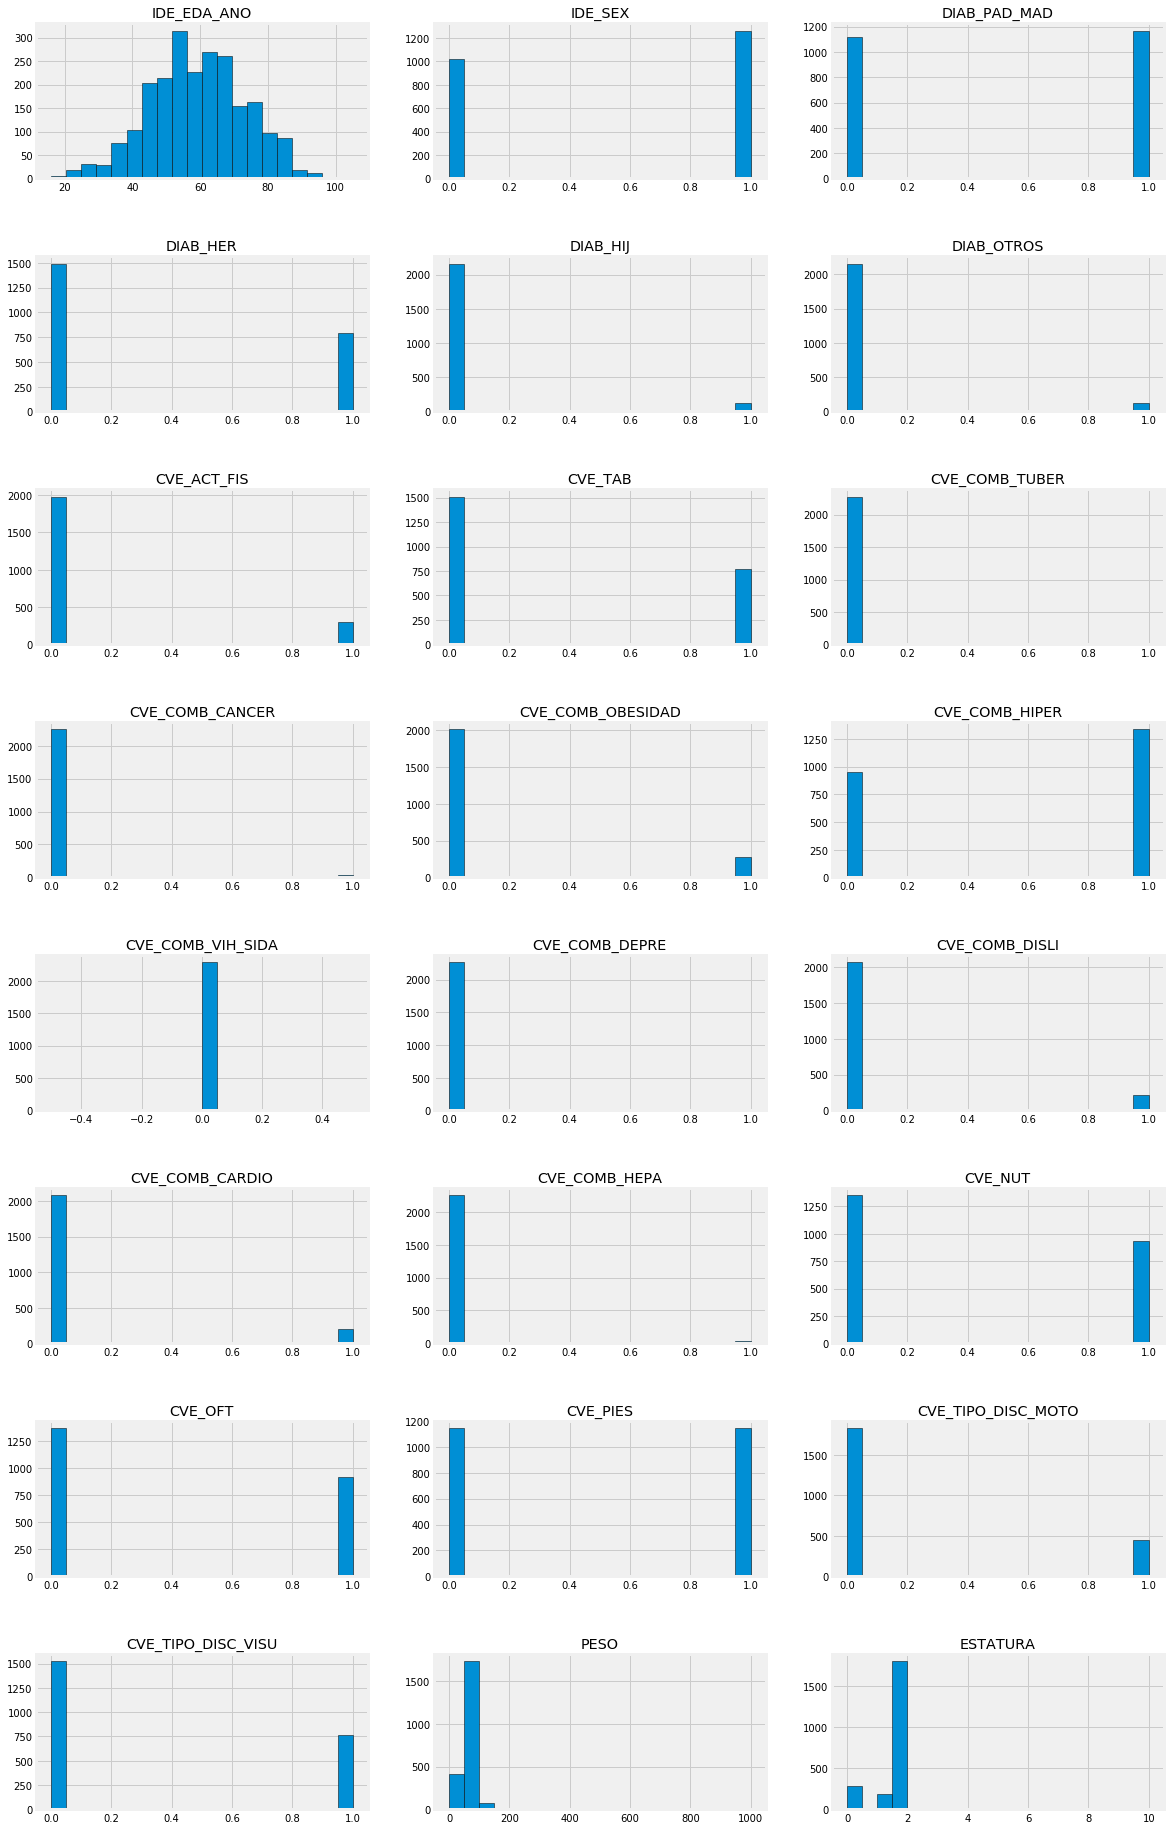

In [7]:
columns=important
plt.subplots(figsize=(18,50))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Importing models

In [8]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Splitting data

In [9]:
outcome=diab[expected]
data=diab[important]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab[expected])# stratify the outcome
train_X=train[important]
test_X=test[important]
train_Y=train[expected]
test_Y=test[expected]

### Models

In [10]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'One Class SVM']



models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),
        LogisticRegression(),KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(), svm.OneClassSVM(kernel="rbf")]
exportable={}

from sklearn.metrics import confusion_matrix



for i in range(len(models)):
    model=models[i]
    model.fit(train_X,train_Y)
    exportable[classifiers[i]]=model
    prediction=model.predict(test_X)
    
    print(i, confusion_matrix(test_Y, prediction))
    
    
    
    
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe




0 [[  0  47]
 [  0 524]]
1 [[  0  47]
 [  0 524]]
2 [[  0  47]
 [  0 524]]
3 [[  2  45]
 [ 12 512]]
4 [[ 10  37]
 [ 47 477]]
5 [[  0   0   0]
 [ 22   0  25]
 [310   0 214]]


,Accuracy
Linear Svm,0.917688
Radial Svm,0.917688
Logistic Regression,0.917688
KNN,0.900175
Decision Tree,0.852890
One Class SVM,0.374781


In [11]:
for name, model in exportable.items():
    print(name, "->", model.predict(train_X.head(1)))
    
    try :
        
        print( "\t->",model.predict_proba(train_X.head(1)))
    except:
        pass
    
   
    



    

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
	-> [[0.0047201 0.9952799]]
KNN -> [1]
	-> [[0. 1.]]
Decision Tree -> [1]
	-> [[0. 1.]]
One Class SVM -> [1]


Random Forest Classifier optimization

In [12]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[important]
Y=diab[expected]
model.fit(X,Y)

serie= pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
d=serie.to_dict()
serie


IDE_EDA_ANO           0.239019
PESO                  0.199133
ESTATURA              0.172647
CVE_PIES              0.038522
DIAB_PAD_MAD          0.036138
CVE_TAB               0.034914
IDE_SEX               0.034190
CVE_COMB_HIPER        0.033660
CVE_TIPO_DISC_VISU    0.024768
DIAB_HER              0.024485
CVE_TIPO_DISC_MOTO    0.020350
CVE_NUT               0.019867
CVE_COMB_OBESIDAD     0.019645
CVE_OFT               0.018554
CVE_COMB_CARDIO       0.017544
CVE_ACT_FIS           0.015581
DIAB_OTROS            0.013441
CVE_COMB_DISLI        0.010975
CVE_COMB_HEPA         0.009740
DIAB_HIJ              0.006411
CVE_COMB_CANCER       0.006056
CVE_COMB_DEPRE        0.003750
CVE_COMB_TUBER        0.000609
CVE_COMB_VIH_SIDA     0.000000
dtype: float64

In [13]:

sorted_d = sorted(d.items(), key=lambda kv: kv[1])[::-1]
sorted_d

[('IDE_EDA_ANO', 0.2390192249950462),
 ('PESO', 0.19913283996598577),
 ('ESTATURA', 0.17264683180512752),
 ('CVE_PIES', 0.03852213994440167),
 ('DIAB_PAD_MAD', 0.036137889369730135),
 ('CVE_TAB', 0.03491425290645026),
 ('IDE_SEX', 0.03419030672767708),
 ('CVE_COMB_HIPER', 0.033659571626369955),
 ('CVE_TIPO_DISC_VISU', 0.02476812414865507),
 ('DIAB_HER', 0.024484978437154435),
 ('CVE_TIPO_DISC_MOTO', 0.02034977626101252),
 ('CVE_NUT', 0.019867431005293406),
 ('CVE_COMB_OBESIDAD', 0.01964458197805087),
 ('CVE_OFT', 0.01855449366503743),
 ('CVE_COMB_CARDIO', 0.017544268436299203),
 ('CVE_ACT_FIS', 0.015580975736108846),
 ('DIAB_OTROS', 0.013440582391207481),
 ('CVE_COMB_DISLI', 0.01097514617764322),
 ('CVE_COMB_HEPA', 0.009740120340850556),
 ('DIAB_HIJ', 0.006410962745671237),
 ('CVE_COMB_CANCER', 0.0060559028813235724),
 ('CVE_COMB_DEPRE', 0.0037502062848111728),
 ('CVE_COMB_TUBER', 0.0006093921700924573),
 ('CVE_COMB_VIH_SIDA', 0.0)]

choosing features

In [14]:

import copy
argc= 3
weighted=[]
for i in range(3):
    weighted.append(sorted_d[i][0])

cut=copy.deepcopy(weighted)
cut.append(expected)

print(cut)

print(weighted)

print(diab.columns)


['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB']
['IDE_EDA_ANO', 'PESO', 'ESTATURA']
Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


In [15]:

diab2=diab[cut]
print(diab2.columns)


Index(['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB'], dtype='object')


In [16]:
from sklearn.preprocessing import StandardScaler 
features=diab2[weighted]
scaler=StandardScaler()
features_standard=scaler.fit_transform(features)

x=pd.DataFrame(features_standard,columns=[weighted])


In [17]:
x[expected] = diab2[expected].values

In [18]:
outcome=x[expected]
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x[expected])
train_X1=train1[weighted]
test_X1=test1[weighted]
train_Y1=train1[expected]
test_Y1=test1[expected]

In [19]:
dict_models={}
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'One Class SVM']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
       svm.OneClassSVM( kernel="rbf")]


for i in range(len(models)):
    model = models[i]
    model.fit(train_X1,train_Y1)
    dict_models[classifiers[i]]= model
    prediction=model.predict(test_X1)
    print(i, confusion_matrix(test_Y, prediction))


    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy'] 



0 [[  0  47]
 [  0 524]]
1 [[  0  47]
 [  0 524]]
2 [[  0  47]
 [  0 524]]
3 [[  4  43]
 [  8 516]]
4 [[  6  41]
 [ 42 482]]
5 [[  0   0   0]
 [ 24   0  23]
 [251   0 273]]


In [20]:



for name, model in dict_models.items():
    print(name, "->", model.predict(train_X1.head(1)))
    try:  
        print("\t\t->",model.predict_proba(train_X1.head(1)))
    except:
        pass

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
		-> [[0.08571691 0.91428309]]
KNN -> [1]
		-> [[0. 1.]]
Decision Tree -> [1]
		-> [[0. 1.]]
One Class SVM -> [1]


In [21]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.917688,0.917688,0.000000
Radial Svm,0.917688,0.917688,0.000000
Logistic Regression,0.917688,0.917688,0.000000
KNN,0.910683,0.900175,0.010508
Decision Tree,0.854641,0.852890,0.001751
One Class SVM,0.478109,0.374781,0.103327
